In [1]:
# Importing the required libraries for data analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skew, norm

## Exporting the train and test data

In [2]:
df_train = pd.read_csv(r"C:\train.csv")

In [3]:
df_test = pd.read_csv(r"C:\test.csv")

## Exploring our datasets

In [4]:
print("Train Data Shape: " + str(df_train.shape))
print("Test Data Shape: " + str(df_test.shape))

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


In [5]:
# Columns common in both datasets.
common_columns = list(set(df_train.columns) & set(df_test.columns))
print(common_columns)
print(len(common_columns))

['BsmtExposure', 'TotRmsAbvGrd', 'Exterior2nd', 'ExterQual', 'YearRemodAdd', 'CentralAir', 'BsmtCond', 'TotalBsmtSF', 'YrSold', 'LandSlope', 'OpenPorchSF', 'GarageCond', 'Alley', 'HalfBath', 'ScreenPorch', 'OverallCond', 'GarageFinish', 'RoofMatl', 'GarageCars', 'FireplaceQu', 'KitchenQual', 'Condition2', 'Fireplaces', 'LowQualFinSF', 'PoolQC', 'MoSold', 'WoodDeckSF', 'YearBuilt', 'HeatingQC', '3SsnPorch', 'LotShape', 'Neighborhood', 'HouseStyle', 'Street', 'Condition1', 'GarageYrBlt', 'OverallQual', 'MiscFeature', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'LotFrontage', 'Id', 'Exterior1st', 'MiscVal', 'PoolArea', 'BsmtFinSF1', 'GarageType', 'BsmtQual', 'BedroomAbvGr', 'BldgType', 'PavedDrive', 'BsmtFinType1', 'Foundation', 'BsmtFullBath', 'GarageArea', 'LotConfig', 'RoofStyle', 'Utilities', 'Functional', '1stFlrSF', 'BsmtHalfBath', 'FullBath', 'Fence', 'Heating', 'Electrical', 'LandContour', 'GrLivArea', 'MasVnrArea', 'SaleType', 'MasVnrType', 'GarageQual', 'SaleCondition', 'LotA

In [6]:
def compare_columns(df1, df2, df1_name, df2_name):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print(f'{df1_name} Columns - {df2_name} Columns :', df1_columns_set - df2_columns_set)
    print(f'{df2_name} Columns - {df1_name} Columns :', df2_columns_set - df1_columns_set)

In [7]:
# Columns not common in both datasets.
compare_columns(df_train, df_test, "Train", "Test")

Train Columns - Test Columns : {'SalePrice'}
Test Columns - Train Columns : set()


In [8]:
df_train[["Id"]].head()

,Id
0,1
1,2
2,3
3,4
4,5


In [9]:
df_test[["Id"]].head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [10]:
df_train = df_train.drop(columns=['Id'])

In [11]:
df_test = df_test.drop(columns=['Id'])

In [12]:
# Observing our target variable i.e. SalePrice.

In [13]:
df_train[["SalePrice"]].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [14]:
df_train[["SalePrice"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


Text(0.5, 1.0, 'Sale Price Distribution')

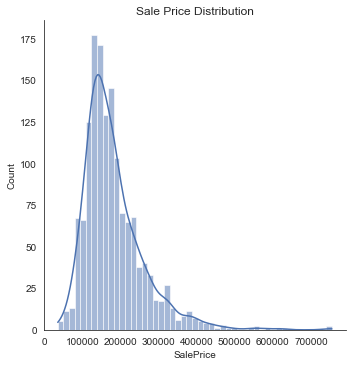

In [15]:
# Visualizing SalePrice distribution.
sns.set_style("white")
sns.set_color_codes(palette='deep')
sns.displot(df_train["SalePrice"], kde=True, color="b")
plt.title("Sale Price Distribution")

In [16]:
shap_t,shap_p = stats.shapiro(df_train['SalePrice'])
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Shapiro_Test: 0.869672
Shapiro_Test: 0.000000


In [17]:
print("Skewness: %f" % abs(df_train['SalePrice']).skew())
print("Kurtosis: %f" % abs(df_train['SalePrice']).kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Data Preprocessing

## Merging train and test datasets

In [18]:
data = pd.concat([df_train, df_test])

In [19]:
data.shape

(2919, 80)

In [20]:
data = data.drop(columns=["SalePrice"])

## Determining the missing values

In [21]:
def percent_missing(df):
    columns_percent_missing = {}
    for column_name in df.columns:
        columns_percent_missing[column_name] = df[column_name].isnull().mean() * 100
    return columns_percent_missing

In [22]:
columns_missing_a_lot = percent_missing(data)
# Converting the dictionary to a dataframe and sorting it in descending order.
columns_missing_a_lot = pd.DataFrame(sorted(columns_missing_a_lot.items(), key=lambda x: x[1], reverse=True))
print('Percentage of missing data')
# Only choosing the columns having more than 5 percent missing values.
columns_missing_a_lot = columns_missing_a_lot[columns_missing_a_lot[1] >= 5]
columns_missing_a_lot

Percentage of missing data


,0,1
0,PoolQC,99.657417
1,MiscFeature,96.402878
2,Alley,93.216855
3,Fence,80.438506
4,FireplaceQu,48.646797
5,LotFrontage,16.649538
6,GarageYrBlt,5.447071
7,GarageFinish,5.447071
8,GarageQual,5.447071
9,GarageCond,5.447071


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType')])

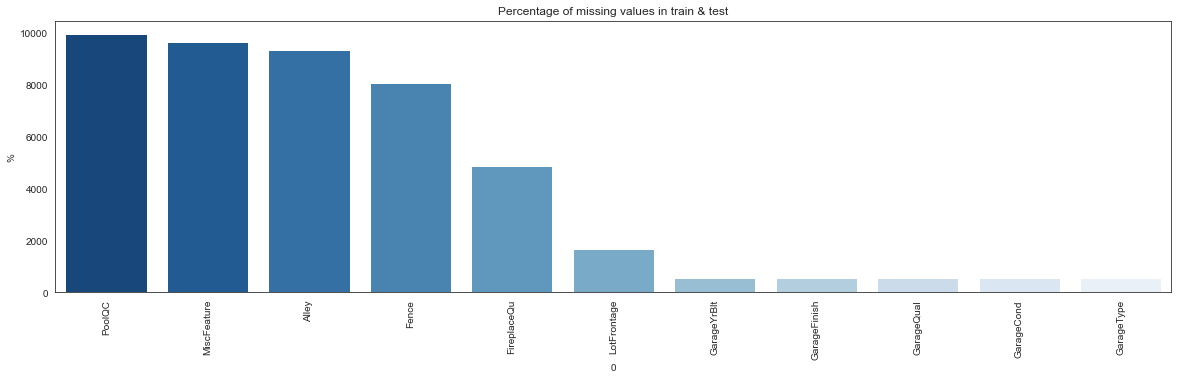

In [23]:
# Visualizing the missing values in these columns.
plt.figure(figsize=(20,5))
sns.barplot(x=columns_missing_a_lot[0], y=columns_missing_a_lot[1] * 100, palette="Blues_r");
plt.title("Percentage of missing values in train & test")
plt.ylabel("%")
plt.xticks(rotation=90)

In [24]:
# But there must be a small percentage of missing values in some other columns too. 

In [25]:
columns_missing_some = percent_missing(data)
# Converting the dictionary to a dataframe and sorting it in descending order.
columns_missing_some = pd.DataFrame(sorted(columns_missing_some.items(), key=lambda x: x[1], reverse=True))
# Only choosing the columns having any percentage of missing values.
columns_missing_some = columns_missing_some[columns_missing_some[1] > 0]
print(f"{len(columns_missing_some[11:])} more columns in the dataframe have missing values.")
columns_missing_some[11:]

23 more columns in the dataframe have missing values.


,0,1
11,BsmtCond,2.809181
12,BsmtExposure,2.809181
13,BsmtQual,2.774923
14,BsmtFinType2,2.740665
15,BsmtFinType1,2.706406
16,MasVnrType,0.822199
17,MasVnrArea,0.787941
18,MSZoning,0.137033
19,Utilities,0.068517
20,BsmtFullBath,0.068517


## Determining the relevant features in the dataset through pearson correlation coefficient

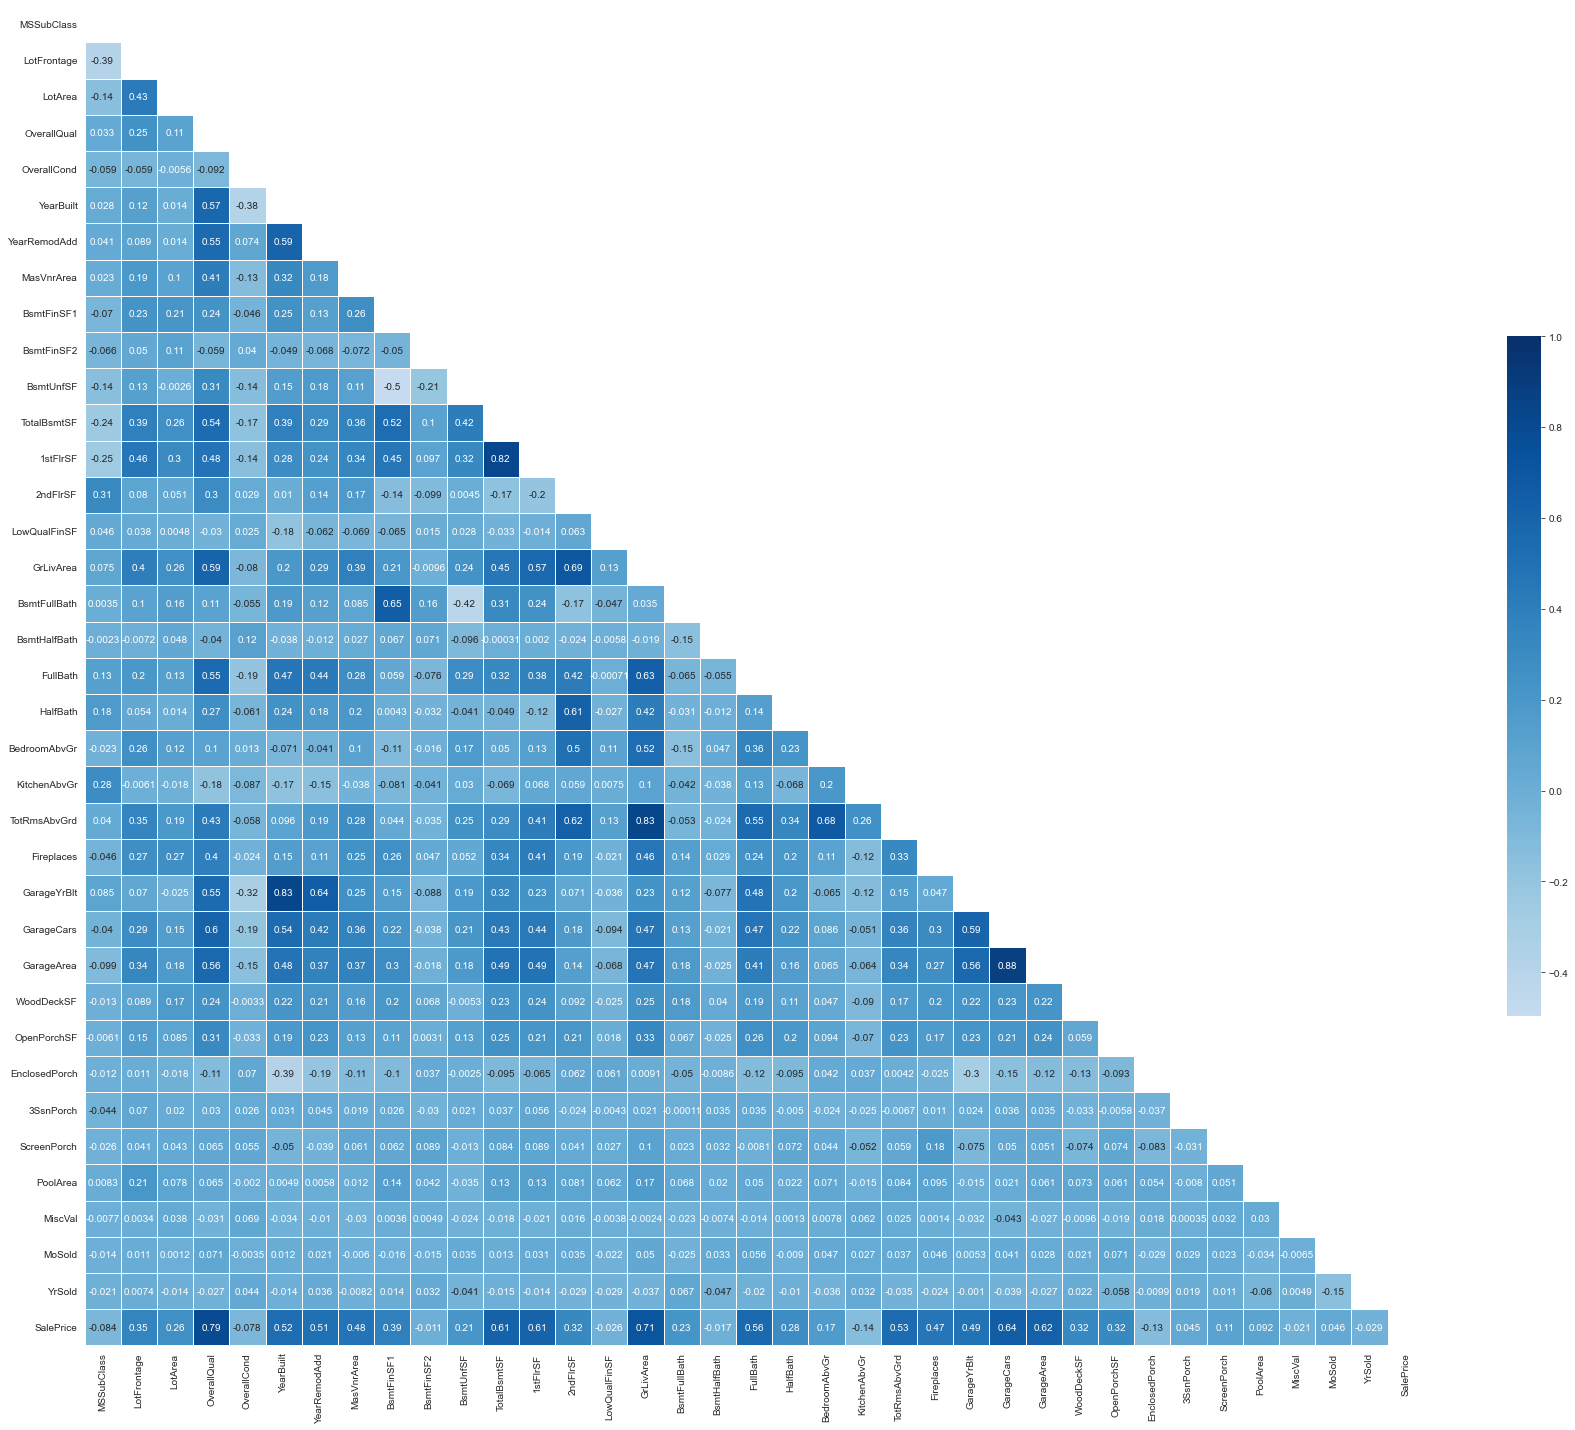

In [26]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(30, 25))
mat = df_train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap="Blues", vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [27]:
most_positively_correlated = ["OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageArea", "GarageCars"]
print("Columns which are most positively correlated to Sale Price:")
print("'Correlation Coefficient Greater than 0.5'")
most_positively_correlated

Columns which are most positively correlated to Sale Price:
'Correlation Coefficient Greater than 0.5'


['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'GarageCars']

In [28]:
print("No strong negative correlation i.e. less than -0.5 was observed from the correlation matrix.")

No strong negative correlation i.e. less than -0.5 was observed from the correlation matrix.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType'),
  Text(11, 0, 'BsmtCond'),
  Text(12, 0, 'BsmtExposure'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtFinType2'),
  Text(15, 0, 'BsmtFinType1'),
  Text(16, 0, 'MasVnrType'),
  Text(17, 0, 'MasVnrArea'),
  Text(18, 0, 'MSZoning'),
  Text(19, 0, 'Utilities'),
  Text(20, 0, 'BsmtFullBath'),
  Text(21, 0, 'BsmtHalfBath'),
  Text(22, 0, 'Functional'),
  Text(23, 0, 'Exterior1st'),
  Text(24, 0, 'Exterior2nd'),
  Text(25, 0, 'BsmtFinSF1'),
  Text(26, 0, 'BsmtFinSF2'),
  Text(27, 0, 'BsmtUnfSF'),
  Text(28, 0, 'TotalBsmtSF'),
  Text(29, 0, 'Ele

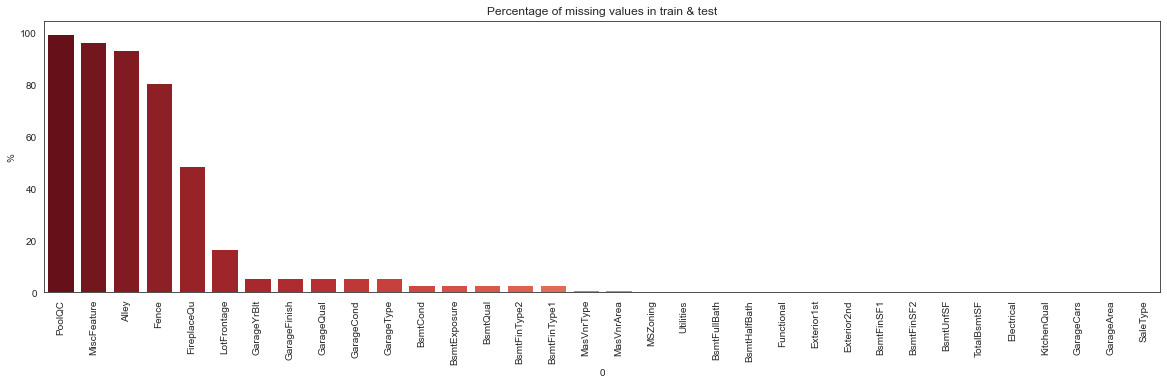

In [29]:
# Visualizing the missing values in all the columns.
plt.figure(figsize=(20,5))
sns.barplot(x=columns_missing_some[0], y=columns_missing_some[1], palette="Reds_r");
plt.title("Percentage of missing values in train & test")
plt.ylabel("%")
plt.xticks(rotation=90)

## Handling the missing values in the dataset

In [30]:
data = data.drop(columns=columns_missing_a_lot[0])

In [31]:
data["MasVnrArea"].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [32]:
data["MasVnrArea"].isna().sum()

23

In [33]:
# As 1738 values in the 'MasVnrArea' that is more than 59 % of them are 0, I've decided to replace the 8 missing values
# in this column with 0 rather than the mean.
data["MasVnrArea"] = data["MasVnrArea"].replace(np.nan, 0)

In [34]:
data["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [35]:
data["Electrical"].isna().sum()

1

In [36]:
# As there is only one missing value in 'Electrical' column, we can replace it with the mode of the column.
data["Electrical"] = data["Electrical"].replace(np.nan, data["Electrical"].mode()[0])

In [37]:
data["BsmtFullBath"].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [38]:
data["BsmtFullBath"].isna().sum()

2

In [39]:
# As there are only 2 missing values in the 'BsmtFullBath' column and 1705 values i.e. more than 58% of them are
# zero, we can replace with the mode.

In [40]:
data["BsmtFullBath"] = data["BsmtFullBath"].replace(np.nan, data["BsmtFullBath"].mode()[0])

In [41]:
# It's a similar case with the 'BsmtHalfBath' column, 2742 values i.e. 93% of them are zero and only 2 missing values.
data["BsmtHalfBath"] = data["BsmtHalfBath"].replace(np.nan, data["BsmtHalfBath"].mode()[0])

In [42]:
# As there is only one missing value in all the remaining numeric columns.
numeric_columns_missing_just_one = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "GarageArea"]
for column in numeric_columns_missing_just_one:
    data[column] = data[column].replace(np.nan, data[column].mode()[0])

In [43]:
# Replacing missing values in categorical columns with a separate category.    
data["MasVnrType"] = data["MasVnrType"].replace(np.nan, "MISVT")
data["BsmtCond"] = data["BsmtCond"].replace(np.nan, "MISBC")
data["BsmtExposure"] = data["BsmtExposure"].replace(np.nan, "MISBE")
data["BsmtQual"] = data["BsmtQual"].replace(np.nan, "MISBQ")
data["BsmtFinType1"] = data["BsmtFinType1"].replace(np.nan, "MISBF1")
data["BsmtFinType2"] = data["BsmtFinType2"].replace(np.nan, "MISBF2")

In [44]:
# Replacing with the mode in these columns as the percentage of missing values is very small i.e. less than 0.13%.
categorical_columns_missing_a_few = ["MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", 
                                     "KitchenQual", "SaleType"]
for column in categorical_columns_missing_a_few:
    data[column] = data[column].replace(np.nan, data[column].mode()[0])

## Data Formatting

In [45]:
# Converting non-numeric predictors stored as numbers into strings.
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)

## Feature Engineering

In [46]:
# New Feature 1.
data["SqFtPerRoom"] = data["GrLivArea"] / (data["TotRmsAbvGrd"] + data["FullBath"] + data["HalfBath"] + data["KitchenAbvGr"])

# New Feature 2.
data['OverallHouseQual'] = data['OverallQual'] + data['OverallCond']

# New Feature 3.
data['TotalBaths'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']

# New Feature 4.
data["HighQualSF"] = data["1stFlrSF"] + data["2ndFlrSF"]

In [47]:
# If the house has.

data['Isgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

data['Isfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

data['Ispool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

data['Issecondfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

data['IsOpenPorch'] = data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

data['IsWoodDeck'] = data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

## Dummy Encoding

In [48]:
data_dummy = pd.get_dummies(data)

In [49]:
data_dummy.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


## Feature Transformation

In [50]:
numeric_features = data_dummy.dtypes[data_dummy.dtypes != object].index
numeric_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=295)

In [51]:
skewed_features  = data_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features

MSSubClass_150         54.000003
Condition2_RRAn        54.000003
RoofMatl_Membran       54.000003
Exterior1st_ImStucc    54.000003
RoofMatl_Roll          54.000003
                         ...    
Heating_GasA           -7.866532
RoofMatl_CompShg       -8.055971
Condition2_Norm        -9.711353
Street_Pave           -15.500133
Utilities_AllPub      -54.000003
Length: 295, dtype: float64

In [52]:
highly_skewed_features = skewed_features[skewed_features > 0.5]
highly_skewed_features

MSSubClass_150         54.000003
Condition2_RRAn        54.000003
RoofMatl_Membran       54.000003
Exterior1st_ImStucc    54.000003
RoofMatl_Roll          54.000003
                         ...    
Exterior2nd_VinylSd     0.639492
BsmtFullBath            0.624832
Exterior1st_VinylSd     0.622114
OverallCond             0.570312
MSSubClass_20           0.540089
Length: 248, dtype: float64

In [53]:
skewed_variables = highly_skewed_features.index
skewed_variables

Index(['MSSubClass_150', 'Condition2_RRAn', 'RoofMatl_Membran',
       'Exterior1st_ImStucc', 'RoofMatl_Roll', 'RoofMatl_ClyTile',
       'RoofMatl_Metal', 'Condition2_RRAe', 'Utilities_NoSeWa',
       'Exterior2nd_Other',
       ...
       'TotRmsAbvGrd', 'Fireplaces', 'LotShape_IR1', 'ExterQual_Gd',
       'HalfBath', 'Exterior2nd_VinylSd', 'BsmtFullBath',
       'Exterior1st_VinylSd', 'OverallCond', 'MSSubClass_20'],
      dtype='object', length=248)

## How to deal with skewed features?

Text(0.5, 1.0, 'Sale Price Distribution after Sqrt Transformation')

<Figure size 1440x360 with 0 Axes>

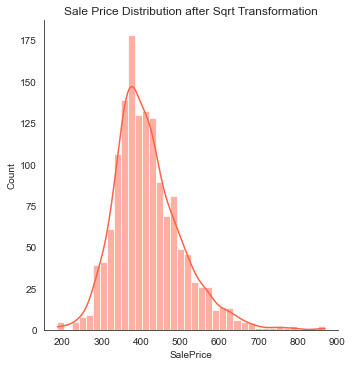

In [54]:
plt.figure(figsize=(20,5))
sns.displot(np.sqrt(df_train.SalePrice), kde=True, color="tomato")
plt.title("Sale Price Distribution after Sqrt Transformation")

Text(0.5, 1.0, 'Sale Price Distribution after Reciprocal Transformation')

<Figure size 1440x360 with 0 Axes>

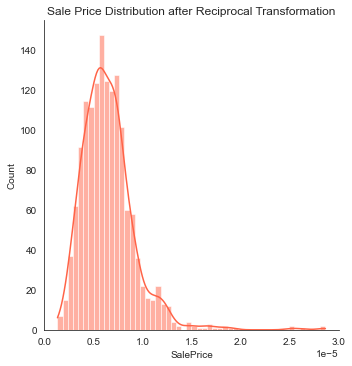

In [55]:
reciprocated_SalePrice = 1/df_train["SalePrice"]
plt.figure(figsize=(20,5))
sns.displot(reciprocated_SalePrice, kde=True, color="tomato")
plt.title("Sale Price Distribution after Reciprocal Transformation")

Text(0.5, 1.0, 'Sale Price Distribution after Log Transformation')

<Figure size 1440x360 with 0 Axes>

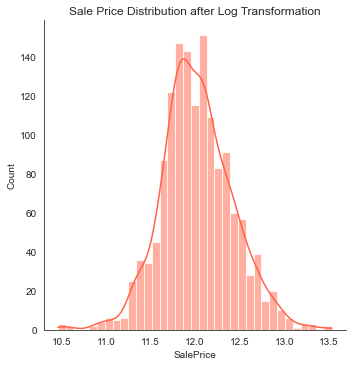

In [56]:
plt.figure(figsize=(20,5))
sns.displot(np.log(df_train.SalePrice), kde=True, color="tomato")
plt.title("Sale Price Distribution after Log Transformation")

## Performing Log Transformation

In [57]:
for i in skewed_variables:
    data_dummy[i] = np.log1p(data_dummy[i])

## Comparing our Dataset before and after

In [58]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SqFtPerRoom,OverallHouseQual,TotalBaths,HighQualSF,Isgarage,Isfireplace,Ispool,Issecondfloor,IsOpenPorch,IsWoodDeck
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,142.500000,12,3.5,1710,1,0,0,1,1,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,140.222222,14,2.5,1262,1,1,0,0,0,1
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,178.600000,12,3.5,1786,1,1,0,1,1,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,190.777778,12,2.0,1717,1,1,0,1,1,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,169.076923,13,3.5,2198,1,1,0,1,1,1


In [59]:
data_dummy.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
4,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [60]:
data.shape

(2919, 78)

In [61]:
data_dummy.shape

(2919, 295)

In [62]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 295 entries, LotArea to SaleCondition_Partial
dtypes: float16(221), float64(30), int64(11), uint8(33)
memory usage: 2.3 MB


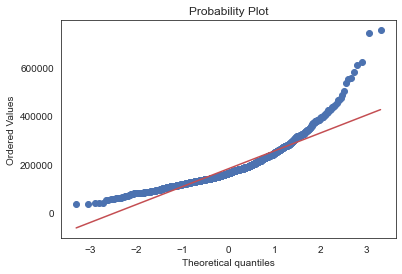

In [63]:
# Before Data Preprocessing.
stats.probplot(df_train["SalePrice"], dist="norm", plot=plt)
plt.show()

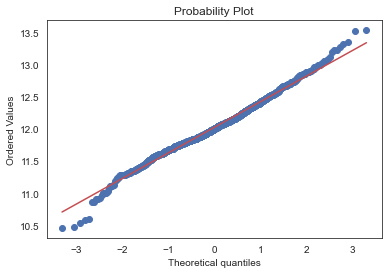

In [64]:
# After Data Preprocessing.
stats.probplot(np.log(df_train.SalePrice), dist="norm", plot=plt)
plt.show()

# Splitting the data back for Model Development

In [65]:
train = data_dummy[:len(df_train)]

In [66]:
train = train.assign(SalePrice=np.log(df_train.SalePrice))

In [67]:
train.shape

(1460, 296)

In [68]:
test = data_dummy[len(df_train):]

In [69]:
test.shape

(1459, 295)

In [70]:
compare_columns(train, test, "Train", "Test")

Train Columns - Test Columns : {'SalePrice'}
Test Columns - Train Columns : set()


# Saving the train and test datasets to csv files

In [71]:
train.to_csv(r"processed_train.csv", index=False)

In [72]:
test.to_csv(r"processed_test.csv", index=False)